In [2]:
# Loading Data 
import pandas as pd  
import numpy as np
from pathlib import Path
import seaborn as sns
import alpaca_trade_api as tradeapi

import matplotlib.pyplot as plt
%matplotlib inline
import os 
from dotenv import load_dotenv
import yfinance as yf
import quandl

In [87]:
# Import Quandl API key
load_dotenv()
quandl_api_key = os.getenv("QUANDL_API_KEY")

In [88]:
# GDP from Quandl 
gdp = quandl.get("FRED/GDP") 
gdp.tail()

,Value
Date,
2019-10-01,21747.394
2020-01-01,21561.139
2020-04-01,19520.114
2020-07-01,21170.252
2020-10-01,21494.731


In [89]:
# Dow Jones Data from 2001
DJI = yf.Ticker("^DJI")
DJI_df = DJI.history(period="20y").reset_index()

In [90]:
DJI_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2001-04-02,9877.160156,9992.530273,9705.070312,9777.929688,237210000,0,0
1,2001-04-03,9774.780273,9774.780273,9428.070312,9485.709961,273290000,0,0
2,2001-04-04,9480.950195,9625.900391,9375.719727,9515.419922,301600000,0,0
3,2001-04-05,9527.209961,9929.790039,9527.209961,9918.049805,281710000,0,0
4,2001-04-06,9913.940430,9913.940430,9698.070312,9791.089844,270000000,0,0


In [91]:
# Cleaned Dow Data 
DJI_df = DJI_df[['Date','Close']].set_index("Date")

In [92]:
DJI_df.head()

,Close
Date,
2001-04-02,9777.929688
2001-04-03,9485.709961
2001-04-04,9515.419922
2001-04-05,9918.049805
2001-04-06,9791.089844


In [93]:
# Dow data described 
DJI_df.describe()

,Close
count,5032.000000
mean,15112.322480
std,6129.901006
min,6547.049805
25%,10456.947510
50%,12654.604980
75%,18001.237793
max,33171.371094


In [94]:
# Dow grouped by month
DJI_grp = DJI_df.groupby([DJI_df.index.year,DJI_df.index.month]).first()
DJI_grp.head()

Close
Date Date              
2001 4      9777.929688
     5     10898.339844
     6     10990.410156
     7     10593.719727
     8     10510.009766

In [95]:
# Dow Month Percent Change 
month_percent_change = DJI_grp.pct_change().dropna()
month_percent_change = pd.DataFrame(month_percent_change)
month_percent_change.head()

Close
Date Date          
2001 5     0.114586
     6     0.008448
     7    -0.036094
     8    -0.007902
     9    -0.048765

In [96]:
# Dow Percent Change 
dow_percent_change = DJI_df.pct_change().dropna()
dow_percent_change.head()

,Close
Date,
2001-04-03,-0.029886
2001-04-04,0.003132
2001-04-05,0.042313
2001-04-06,-0.012801
2001-04-09,0.005521


# Confidence Indicator on Dow

In [3]:
# Import confidence Data 
confidence_path = Path("data/one_year_confidence.csv")
confidence = pd.read_csv(confidence_path,parse_dates=True, index_col='Date', infer_datetime_format=True).dropna()

In [4]:
dow_pct_change_path = Path("data/Dow Pct Change.csv")
dow_pct_change = pd.read_csv(dow_pct_change_path,parse_dates=True, index_col='Date', infer_datetime_format=True).dropna()
dow_pct_change.head()

,Percent Change
Date,
2000-05-01,-0.020918
2000-06-01,-0.008902
2000-07-01,0.005988
2000-08-01,0.071131
2000-09-01,-0.051959


In [5]:
confidence.head()

,US Institutional,US Individual
Date,,
2021-02-01,62.12,75.00
2021-01-01,61.90,73.17
2020-12-01,61.54,69.17
2020-11-01,62.86,70.68
2020-10-01,67.61,70.71


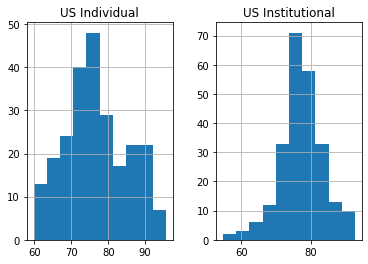

In [164]:
confidence_dist = confidence.hist()

In [101]:
confidence['US Institutional'].min()

54.74

In [17]:
confidence['US Individual'].min()

59.75

In [18]:
# US Institutional data less than 60%
confidence.loc[confidence['US Institutional'] < 60].round(2)

,US Institutional,US Individual
Date,,
2000-04-01,56.82,76.34
1999-04-01,54.74,75.59


In [166]:
confidence.head()

,US Institutional,US Individual
Date,,
2021-02-01,62.12,75.00
2021-01-01,61.90,73.17
2020-12-01,61.54,69.17
2020-11-01,62.86,70.68
2020-10-01,67.61,70.71


In [6]:
# US individual less than 70%
individual_below_70 = confidence.loc[confidence['US Individual'] < 70].round(2)
individual_below_70.count()

US Institutional    53
US Individual       53
dtype: int64

In [322]:
#ind_and_dow_less_70.head()

In [7]:
# Percent of Dow when individual confidence less than
ind_and_dow_less_70 = pd.concat([dow_pct_change,individual_below_70], axis='columns', join='inner')
#ind_and_dow_less_70[["Percent Change"]].mean()
cumulative_returns = ind_and_dow_less_70[["Percent Change"]]+1
cumulative_returns.cumprod().tail(1)

,Percent Change
Date,
2020-12-01,1.413598


In [8]:
# US institutional confidence less than 70%
institutional_below_70 = confidence.loc[confidence['US Institutional'] < 70].round(2)
institutional_below_70.count()

US Institutional    24
US Individual       24
dtype: int64

In [9]:
# Dow Performance when institutional confidence is below 70
inst_and_dow_less_70 = pd.concat([dow_pct_change,institutional_below_70], axis='columns', join='inner')
cumulative_returns = inst_and_dow_less_70[["Percent Change"]]+1
cumulative_returns.cumprod().tail(1)

,Percent Change
Date,
2021-02-01,1.154175


In [12]:
# Dow Performance when institutional confidence is below 70
# US institutional confidence less than 70%
institutional_below_70 = confidence.loc[confidence['US Institutional'] > 70].round(2)
inst_and_dow_less_70 = pd.concat([dow_pct_change,institutional_below_70], axis='columns', join='inner')
cumulative_returns = inst_and_dow_less_70[["Percent Change"]]+1
cumulative_returns.cumprod().tail(1)

#cumulative_returns.count()

,Percent Change
Date,
2020-08-01,2.827144


In [308]:
#inst_and_dow_less_70.count()
#dow_pct_change.count()

Percent Change    252
dtype: int64

In [1]:
# Dow Performance when institutional confidence is below 70
# US institutional confidence less than 70%
institutional_below_70 = confidence.loc[confidence['US Individual'] > 80].round(2)
inst_and_dow_less_70 = pd.concat([dow_pct_change,institutional_below_70], axis='columns', join='inner')
cumulative_returns = inst_and_dow_less_70[["Percent Change"]]+1
cumulative_returns.cumprod().tail(1)

NameError: name 'confidence' is not defined

In [21]:
# Confidence percent change
confidence_pct_change = confidence.pct_change().dropna()
confidence_pct_change.head()

,US Institutional,US Individual
Date,,
2021-01-01,-0.003542,-0.024400
2020-12-01,-0.005816,-0.054667
2020-11-01,0.021449,0.021830
2020-10-01,0.075565,0.000424
2020-09-01,0.033279,-0.009051


In [333]:
conf_and_dow = pd.concat([dow_pct_change,confidence], axis='columns', join='inner')

cumulative_returns = conf_and_dow[["Percent Change"]]+1
cumulative_returns.cumprod().tail(1)

#cumulative_returns.count()
cumulative_returns = dow_pct_change[["Percent Change"]]+1
cumulative_returns.cumprod().tail(1)

#1.75 Years more than inst > 70
# 25% more return

,Percent Change
Date,
2021-04-01,3.081464


In [336]:
instutitional_greater_individual = confidence.loc[confidence["US Institutional"] > confidence["US Individual"]]

#instutitional_greater_individual.head()
# If you were to invest ONLY when institutional confidence was greater than individual confidence, you would have a return of almost 97%
institutional_greater_individual = pd.concat([dow_pct_change,instutitional_greater_individual], axis='columns', join='inner')
cumulative_returns = institutional_greater_individual[["Percent Change"]]+1
cumulative_returns.cumprod().tail(1)

,Percent Change
Date,
2020-07-01,1.972136


In [335]:
instutitional_greater_individual = confidence.loc[confidence["US Institutional"] < confidence["US Individual"]]

#instutitional_greater_individual.head()
# If you were to invest ONLY when institutional confidence was greater than individual confidence, you would have a return of almost 65%
institutional_greater_individual = pd.concat([dow_pct_change,instutitional_greater_individual], axis='columns', join='inner')
cumulative_returns = institutional_greater_individual[["Percent Change"]]+1
cumulative_returns.cumprod().tail(1)

,Percent Change
Date,
2021-02-01,1.654561


In [48]:
# Institutional confidence that dropped
institutional_zero = confidence_pct_change.loc[confidence_pct_change["US Institutional"] < -0.08]
institutional_zero.count()

US Institutional    5
US Individual       5
dtype: int64

In [49]:
# Individual confidence that dropped
individual_zero = confidence_pct_change.loc[confidence_pct_change["US Individual"] < -0.08]
individual_zero.count()

US Institutional    4
US Individual       4
dtype: int64

Percent Change   -0.001684
dtype: float64

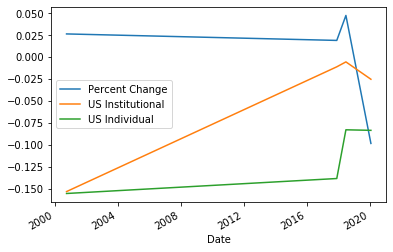

In [50]:
# Individual confidence when dipping 4%
no_individual = pd.concat([dow_pct_change,individual_zero], axis='columns', join='inner')
no_individual.plot()
no_individual[["Percent Change"]].mean()

Percent Change    0.015721
dtype: float64

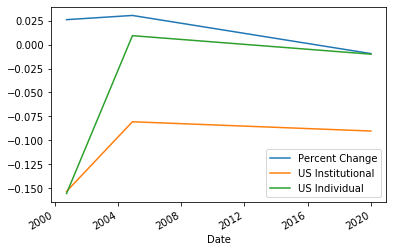

In [52]:
# Institutional confidence when dipping 8%
no_institution = pd.concat([dow_pct_change,institutional_zero], axis='columns', join='inner')
no_institution.plot()
no_institution[["Percent Change"]].mean()

In [26]:
#dow_pct_change = DJI_df.pct_change().dropna()
#dow_pct_change.head()

dow_and_confidence = pd.concat([dow_pct_change,confidence_pct_change], axis='columns', join='inner')

In [27]:
dow_and_confidence.head()

,Percent Change,US Institutional,US Individual
Date,,,
2000-10-01,0.026084,-0.153486,-0.155667
2001-04-01,0.081501,0.133126,-0.006545
2001-07-01,-0.001995,-0.010634,-0.007159
2001-08-01,-0.049034,0.005151,0.024255
2001-09-01,-0.115439,-0.023516,-0.041730


In [28]:
dow_corr = dow_and_confidence.corr()
dow_corr
#sns.heatmap(dow_corr,vmin=-1,vmax=1)

,Percent Change,US Institutional,US Individual
Percent Change,1.000000,0.108051,0.063783
US Institutional,0.108051,1.000000,0.266446
US Individual,0.063783,0.266446,1.000000


In [56]:
no_institution.corr()

,Percent Change,US Institutional,US Individual
Percent Change,1.000000,-0.295420,-0.310302
US Institutional,-0.295420,1.000000,0.999878
US Individual,-0.310302,0.999878,1.000000


In [35]:
# Institutional confidence that increased
institutional_great = confidence_pct_change.loc[confidence_pct_change["US Institutional"] > 0.05]
institutional_great.count()

US Institutional    17
US Individual       17
dtype: int64

Percent Change    0.016046
dtype: float64

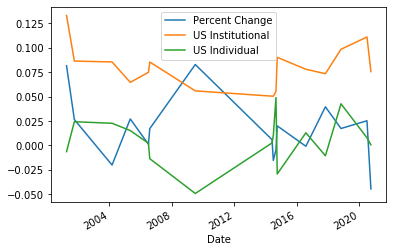

In [36]:
# Institutional Plot when confidence increase
great_institution = pd.concat([dow_pct_change,institutional_great], axis='columns', join='inner')
great_institution.plot()
great_institution[["Percent Change"]].mean()

In [40]:
# Individual confidence increase 
individual_great = confidence_pct_change.loc[confidence_pct_change["US Individual"] > 0.05]
individual_great.count()

US Institutional    15
US Individual       15
dtype: int64

Percent Change    0.009444
dtype: float64

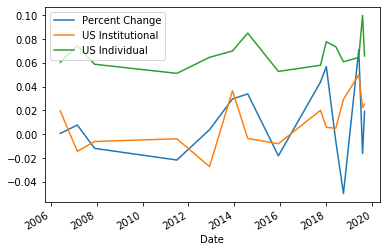

In [42]:
# Individual confidence when increasing 5%
great_individual = pd.concat([dow_pct_change,individual_great], axis='columns', join='inner')
great_individual.plot()
great_individual[["Percent Change"]].mean()

# Dow on Confidence Indicator

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff2a0064eb0>,
      dtype=object)

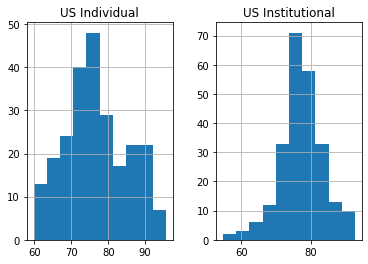

In [132]:
confidence.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff305721d60>]],
      dtype=object)

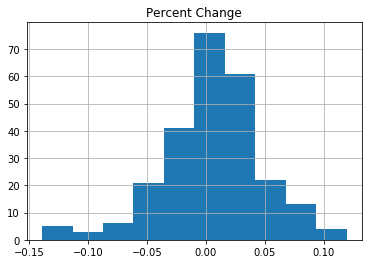

In [124]:
dow_pct_change.hist()

In [184]:
# Percent of dow dropping 5%
dow_drop_5 = dow_and_confidence.loc[dow_and_confidence['Percent Change'] < -.05]
dow_drop_5.count()

Percent Change      21
US Institutional    21
US Individual       21
dtype: int64

In [145]:
dow_drop_5 = dow_and_confidence.loc[dow_and_confidence["Percent Change"] <-.05]
dow_drop_5.count()

Percent Change      21
US Institutional    21
US Individual       21
dtype: int64

In [156]:
# Dow on Confidence 
dow_impact = pd.concat([dow_drop_5,confidence], axis='columns', join='inner')

dow_impact[["US Institutional"]].mean()

US Institutional    -0.006152
US Institutional    78.916190
dtype: float64

In [157]:
dow_impact.head()

,Percent Change,US Institutional,US Individual,US Institutional,US Individual
Date,,,,,
2001-09-01,-0.115439,-0.023516,-0.041730,77.65,88.64
2002-06-01,-0.067708,0.000713,0.010171,84.21,88.39
2002-07-01,-0.058143,0.041847,0.028928,84.15,87.50
2002-09-01,-0.121590,0.015327,-0.011930,81.48,84.48
2002-12-01,-0.060630,-0.031039,-0.021773,80.23,88.51


In [158]:
dow_impact[["US Individual"]].mean()

US Individual    -0.016261
US Individual    75.934286
dtype: float64

In [160]:
# Dow gain 5%
dow_gain_5 = dow_and_confidence.loc[dow_and_confidence['Percent Change'] > .05]
dow_gain_5.count()

Percent Change      27
US Institutional    27
US Individual       27
dtype: int64

In [161]:
# Dow gain and  Confidence 
dow_good_impact = pd.concat([dow_gain_5,confidence], axis='columns', join='inner')

dow_good_impact[["US Institutional"]].mean()

US Institutional     0.019359
US Institutional    77.661481
dtype: float64

In [163]:
dow_good_impact[["US Individual"]].mean()

US Individual     0.005923
US Individual    77.589259
dtype: float64

# Crash Confidence Correct? 

In [82]:
# Import confidence Data (Percent of population that thinks market is not too high)
# High numnber indicates more bullish sentiment 
# Low number indicates bearish sentiment
valuation_confidence_path = Path("data/us_valuation_confidence_index.csv")
valuation_confidence = pd.read_csv(valuation_confidence_path,parse_dates=True, index_col='Date', infer_datetime_format=True)

In [83]:
valuation_confidence.head()

,US Institutional,US Individual
Date,,
2021-02-01,42.70,29.51
2021-01-01,43.82,28.78
2020-12-01,44.68,31.47
2020-11-01,41.84,33.77
2020-10-01,46.39,34.16


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff3050faf70>,
      dtype=object)

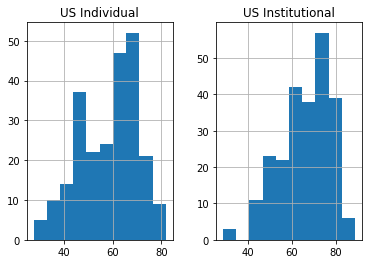

In [102]:
valuation_confidence.hist()

In [185]:
# US individual less than 70%
individual_greater_80 = confidence.loc[confidence['US Individual'] > 80].round(2)
individual_greater_80.count()

US Institutional    72
US Individual       72
dtype: int64

In [188]:
individual_greater_80.count()

US Institutional    72
US Individual       72
dtype: int64

In [196]:
confidence.head()

,US Institutional,US Individual
Date,,
2021-02-01,62.12,75.00
2021-01-01,61.90,73.17
2020-12-01,61.54,69.17
2020-11-01,62.86,70.68
2020-10-01,67.61,70.71


In [206]:
confidence[['US Individual']].reset_index().max()

Date             2021-02-01 00:00:00
US Individual                  95.62
dtype: object

In [208]:
confidence[['US Individual']].reset_index().min()

Date             1999-04-01 00:00:00
US Individual                  59.75
dtype: object

In [211]:
lowest_individual_confidence = confidence.sort_values("US Individual", ascending = True)

In [212]:
lowest_individual_confidence.head()

,US Institutional,US Individual
Date,,
2017-08-01,72.85,59.75
2019-10-01,66.33,59.79
2017-07-01,74.40,60.12
2017-11-01,69.92,60.61
2017-04-01,79.61,60.69


In [241]:
DJI_df_sorted = DJI_df.sort_values("Close", ascending = True)#.reset_index()
DJI_df_sorted = pd.DataFrame(DJI_df_sorted)
DJI_df_sorted.loc[[DJI_df_sorted['2017-08-01':'2018-02-01',:]]]

TypeError: '(slice('2017-08-01', '2018-02-01', None), slice(None, None, None))' is an invalid key

In [238]:
DJI_df_sorted.groupby['Date'][2017-08-01':'2018-02-01']

,Date,Close
0,2009-03-09,6547.049805
1,2009-03-05,6594.439941
2,2009-03-06,6626.939941
3,2009-03-03,6726.020020
4,2009-03-02,6763.290039
